<a href="https://colab.research.google.com/gist/Aryanjain32/540e75b74485fe4c51f784a402c911f1/breast-cancer-project-aryan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
df = pd.read_csv("data.csv")

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isna().sum()
df[df.duplicated]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['diagnosis'] = oe.fit_transform(df[['diagnosis']])

In [12]:
x = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_ss = ss.fit_transform(x)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_ss, y, test_size=0.2, random_state=42)

In [15]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
pred_rf = rf.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, pred_rf))
print("Accuracy Score:", accuracy_score(y_test, pred_rf))

Random Forest Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        71
         1.0       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy Score: 0.9649122807017544


hyperparameter

In [ ]:
from yellowbrick.model_selection import validation_curve
num_est=[100,200,450,500,700,1000]


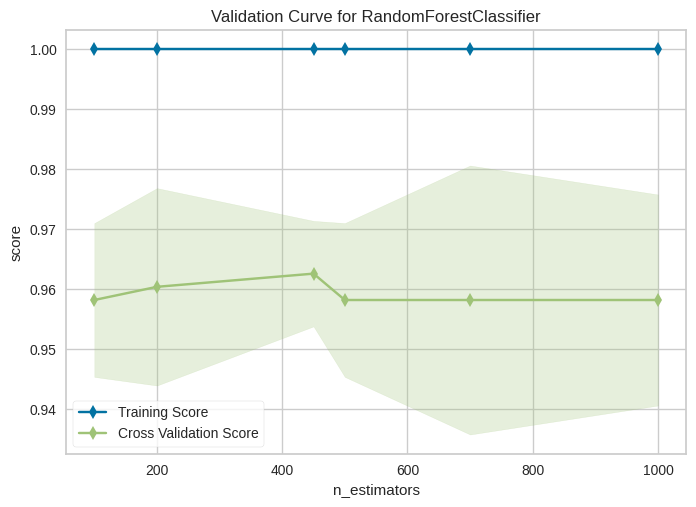

In [ ]:
viz = validation_curve(estimator=RandomForestClassifier(), X=X_train, y=y_train,
    param_name="n_estimators",
    param_range=num_est,
    scoring="accuracy",
    cv=5  # Number of cross-validation folds
)

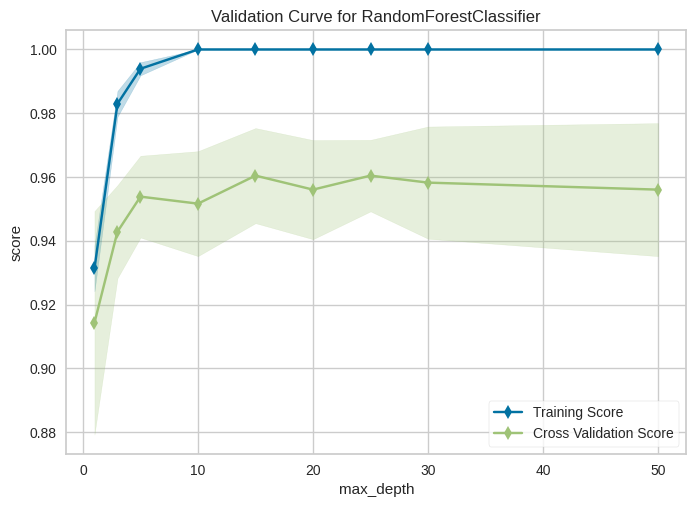

In [ ]:
depths_vals=[1, 3, 5, 10, 15, 20, 25, 30, 50,]
viz1 = validation_curve(estimator=RandomForestClassifier(), X=X_train, y=y_train,
    param_name="max_depth",
    param_range=depths_vals,
    scoring="accuracy",
    cv=5  # Number of cross-validation folds
)


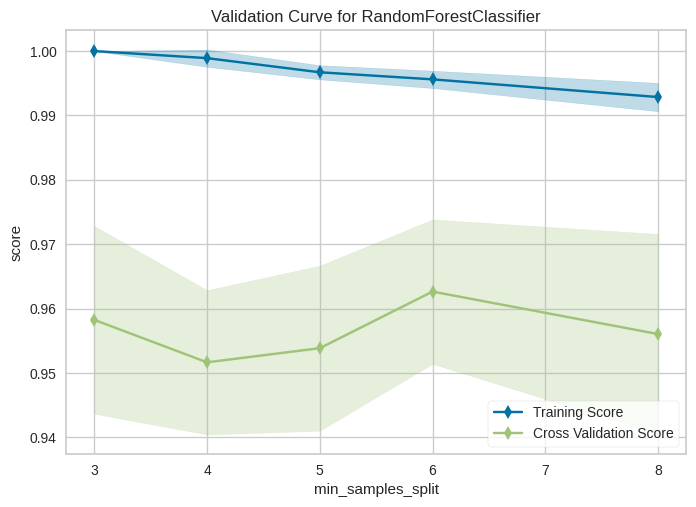

In [ ]:
min_sample=[3,4,5,6,8]
viz2 = validation_curve(estimator=RandomForestClassifier(), X=X_train, y=y_train,
    param_name="min_samples_split",
    param_range=min_sample,
    scoring="accuracy",
    cv=5  # Number of cross-validation folds
)

In [ ]:
cls2=RandomForestClassifier(n_estimators=200,min_samples_split=6,max_depth=15,random_state=0)
cls2.fit(X_train,y_train)
pred2=cls2.predict(X_test)
print(accuracy_score(y_test,pred2))
#print(classification_report(y_test,pred2))

0.9649122807017544


In [ ]:
#Gradient Boosting model
from sklearn.ensemble import GradientBoostingClassifier
gbc_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc_model.fit(X_train, y_train)
y_pred_gb = gbc_model.predict(X_test)
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.97        71
         1.0       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy Score: 0.956140350877193


In [ ]:
#XGBoost model
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_xgb))

XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.97        71
         1.0       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy Score: 0.956140350877193


In [ ]:
#MLPClassifier model
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("Accuracy Score:", accuracy_score(y_test, y_pred_mlp))


MLP Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        71
         1.0       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy Score: 0.9736842105263158


In [ ]:
pip install tpot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 12.4 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=38a596168cad77754c14db9ff318baf9c4e5166c9398a4d446d5bfc514bc7815
  Stored in directory: /root/.cache/pip/wheels/da/77/2d/adbc56bc4db95ad80c6d4e71cd69e2d9d122174904342e3f7f
Successfully built stopit


In [ ]:
# TPOTClassifier model
from tpot import TPOTClassifier
tpot_model = TPOTClassifier( generations=5, population_size=20, random_state=42 )
tpot_model.fit(X_train, y_train)
y_pred_tpot = tpot_model.predict(X_test)
print("TPOT Classification Report:\n", classification_report(y_test, y_pred_tpot))
print("Accuracy Score:", accuracy_score(y_test, y_pred_tpot))

is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
TPOT Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        71
         1.0       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Accuracy Score: 0

In [ ]:
# ANN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
dnn_model = Sequential()
dnn_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dense(1, activation='sigmoid'))
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
y_pred_dnn = (dnn_model.predict(X_test) > 0.5).astype("int32")
print("DNN Classification Report:\n", classification_report(y_test, y_pred_dnn))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dnn))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6533 - loss: 0.6182 - val_accuracy: 0.8681 - val_loss: 0.3790
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9303 - loss: 0.3325 - val_accuracy: 0.9341 - val_loss: 0.2502
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9551 - loss: 0.2238 - val_accuracy: 0.9560 - val_loss: 0.1892
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9657 - loss: 0.1619 - val_accuracy: 0.9451 - val_loss: 0.1548
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9717 - loss: 0.1314 - val_accuracy: 0.9670 - val_loss: 0.1348
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9866 - loss: 0.0898 - val_accuracy: 0.9670 - val_loss: 0.1226
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9808 - loss: 0.0860 - val_accuracy: 0.9670 - val_loss: 0.1153
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9890 - loss: 0.0636 - val_accuracy: 0.9670 - val_loss: 0.1094
Ep

In [16]:
#Hyperparameter for MLP Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (150, 100), (200, 100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'batch_size': [32, 64, 128],
    'max_iter': [200, 500]
}
mlp = MLPClassifier(random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
best_mlp = grid_search.best_estimator_


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Hyperparameters: {'activation': 'relu', 'batch_size': 32, 'hidden_layer_sizes': (200, 100, 50), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'sgd'}


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
#Fitting the tuned MLP Model
best_mlp.fit(X_train, y_train)
y_pred_best_mlp = best_mlp.predict(X_test)
print("Tuned MLP Classification Report:\n", classification_report(y_test, y_pred_best_mlp))
print("Accuracy Score:", accuracy_score(y_test, y_pred_best_mlp))



Tuned MLP Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        71
         1.0       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy Score: 0.9736842105263158


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [19]:
import joblib
joblib.dump(best_mlp, 'best_mlp_model.pkl')

['best_mlp_model.pkl']